In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[137 146 151 ... 101  98 100]
 [146 155 171 ... 121  99 128]
 [156 175 176 ... 154 117  92]
 ...
 [ 96 103  99 ...  76  77  79]
 [ 92  99  93 ...  72  71  68]
 [ 69  93  91 ...  69  64  63]]


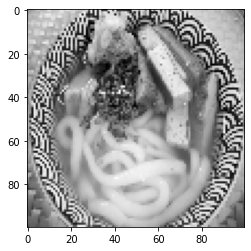

In [3]:
datadir = "/content/drive/MyDrive/food VN"
categories=['Banh Canh','Banh my','Banhchung','Banhkhot','Comtam','Galuoc','Goicuon','Kembo','Pho','bun bo']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [4]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 31/31 [00:25<00:00,  1.21it/s]

310


In [5]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (310, 100, 100, 1)
y (310,)


In [6]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/Pickle/FoodVn/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/Pickle/FoodVn/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [8]:
pickle_in = open("/content/drive/MyDrive/Pickle/FoodVn/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Pickle/FoodVn/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (310, 100, 100, 1)
y (310,)


In [9]:
y= to_categorical(y,10)

In [10]:
y.shape

(310, 10)

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [12]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=150,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/150
4/4 [==============================] - 13s 499ms/step - loss: 3.1551 - accuracy: 0.0806 - val_loss: 4.6177 - val_accuracy: 0.0000e+00
Epoch 2/150
4/4 [==============================] - 0s 65ms/step - loss: 2.2939 - accuracy: 0.1411 - val_loss: 3.6001 - val_accuracy: 0.0000e+00
Epoch 3/150
4/4 [==============================] - 0s 64ms/step - loss: 2.2289 - accuracy: 0.1210 - val_loss: 3.1856 - val_accuracy: 0.0000e+00
Epoch 4/150
4/4 [==============================] - 0s 63ms/step - loss: 2.1907 - accuracy: 0.1452 - val_loss: 3.9289 - val_accuracy: 0.0000e+00
Epoch 5/150
4/4 [==============================] - 0s 64ms/step - loss: 2.1354 - accuracy: 0.1331 - val_loss: 5.4413 - val_accuracy: 0.0000e+00
Epoch 6/150
4/4 [==============================] - 0s 64ms/step - loss: 2.1265 - accuracy: 0.1452 - val_loss: 6.2132 - val_accuracy: 0.0000e+00
Epoch 7/150
4/4 [==============================] - 0s 64ms/step - loss: 2.0954 - accuracy: 0.2379 - val_loss: 5.6183 - val_accuracy: 0

In [13]:
model.save('foodVN.h5')

In [14]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'Banh Canh',
          1: 'Banh my',2: 'Banhchung',3:'Banhkhot',4:'Comtam',5:'Galuoc',6:'Goicuon',7:'Kembo',8:'pho',9:'bun bo'    
          }
model = load_model('foodVN.h5')


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
expectation Kembo


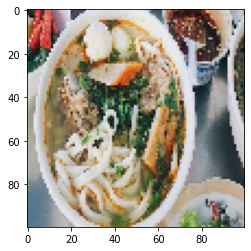

In [15]:
	# load model
img = load_image('banhcanhtest.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Banh my


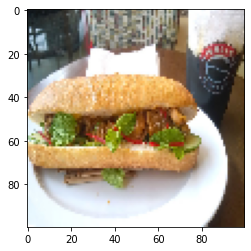

In [16]:
	# load model
img = load_image('banhmytest.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Banh Canh


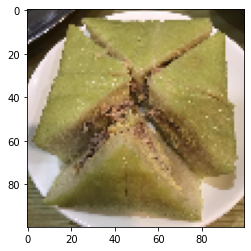

In [17]:
	# load model
img = load_image('banhchungtest00.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
expectation Kembo


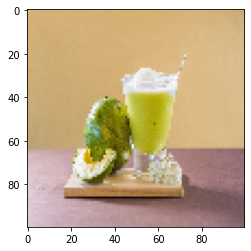

In [18]:
	# load model
img = load_image('kembo test.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])